In [38]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.models import Model

In [39]:
#Load the data
data = pd.read_csv('/content/spam.csv',delimiter=',',encoding='latin-1')
print(data.head())

     v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]


In [40]:
#Dropping the unwanted columns
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [41]:
data.columns

Index(['v1', 'v2'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Ham and Spam Messages')

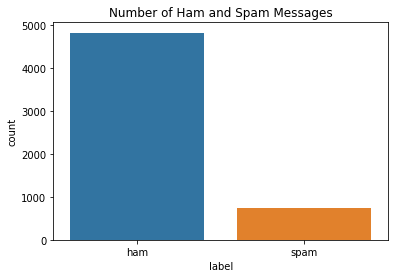

In [42]:
# Understand the distribution better
sns.countplot(data['v1'])
plt.xlabel('label')
plt.title('Number of Ham and Spam Messages')

In [43]:
#Create Input and ouput vectors
x = data.v2
y = data.v1

In [44]:
#Label Encoder
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
# Forcely Converting 2D dependent variable into 1D  
y = y.reshape(-1,1)

In [49]:
#Splitting into training and test data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.15)

**Process the data**

Tokenize the data and convert the text to sequences.Add padding to ensure that all the sequences have the same shape.There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [53]:
# Top 1000 frequently occurring words
max_words = 1000

# Define the sequence lengths, max number of words and embedding dimensions
# Sequence length of each sentence. If more, truncate. If less, pad with zeros
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(xtrain)
tok

In [54]:
#Transform each text to a sequence of integers
sequencee = tok.texts_to_sequences(xtrain)

In [55]:
#Paddig
sequence_matrix = sequence.pad_sequences(sequencee,maxlen=max_len)

In [67]:
#Build the model RNN
i = Input(name='Inputs',shape=(max_len))
x = Embedding(max_words,50,input_length=max_len)(i)
x = LSTM(64)(x)
x = Dense(256,name='FC1',activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)

In [68]:
#Call the function and compile the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_5 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 96,337
Trainable params: 96,337
Non-trainable

In [69]:
#Fit the training data
lstm = model.fit(sequence_matrix,ytrain,batch_size=128,epochs=10,
                 validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 8s 199ms/step - loss: 0.3283 - accuracy: 0.8823 - val_loss: 0.1366 - val_accuracy: 0.9684
Epoch 2/10
30/30 [==============================] - 5s 180ms/step - loss: 0.0924 - accuracy: 0.9781 - val_loss: 0.0464 - val_accuracy: 0.9895


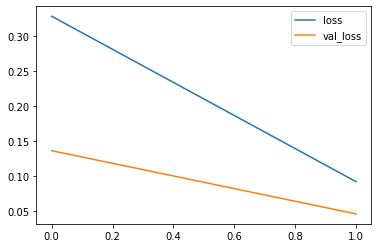

In [70]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(lstm.history['loss'], label='loss')
plt.plot(lstm.history['val_loss'], label='val_loss')
plt.legend()

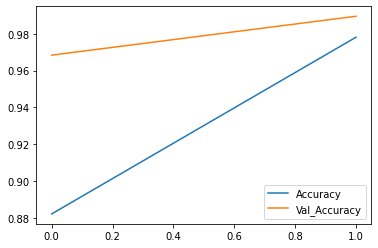

In [72]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(lstm.history['accuracy'], label='Accuracy')
plt.plot(lstm.history['val_accuracy'], label='Val_Accuracy')
plt.legend()

In [74]:
# Process the test set data.
test_sequences = tok.texts_to_sequences(xtest)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [75]:
#Evaluate the model on test data
accr = model.evaluate(test_sequences_matrix,ytest)

27/27 [==============================] - 1s 19ms/step - loss: 0.0475 - accuracy: 0.9844


In [84]:
print('Test Results :\n Loss : {}\n Accuracy : {}'.format(accr[0],accr[1]))

Test Results :
 Loss : 0.047454673796892166
 Accuracy : 0.9844497442245483
